# Project 2 - Ames Housing Data and Kaggle Challenge

## Part 2

### Contents:
- [EDA](#EDA)
- [Modelling](#Modelling)
- [Modelling - Lasso Regression](#Modelling---Lasso-Regression)
- [Conclusion](#Conclusion)
- [Recommendation](#Recommendation)


### Importing

In [1]:
# import the relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import matplotlib.patches as mpatches
import scipy.stats as stats
from numpy.random import rand
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge, ElasticNetCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
#download the train data
datatrain = pd.read_csv('./datasets/datatrain(cleanup).csv')

#to be able to see all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [3]:
datatrain.shape

(2011, 171)

In [4]:
datatrain.head()

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,SalePrice,Building age,Remodel age,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Alley_1,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,69.0,13517,2,2,6,8,289.0,3,2,3,3,1,6,533.0,0.0,192.0,725.0,4,4,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,7,0,2,2.0,475.0,3,2,0,44,0,0,0,0,0,0,3,130500,34,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,43.0,11492,2,2,7,5,132.0,3,2,4,3,1,6,637.0,0.0,276.0,913.0,4,4,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,7,1,2,2.0,559.0,3,2,0,74,0,0,0,0,0,0,4,220000,13,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,68.0,7922,3,2,5,7,0.0,2,3,3,3,1,6,731.0,0.0,326.0,1057.0,2,4,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,7,0,1,1.0,246.0,3,2,0,52,0,0,0,0,0,0,1,109000,57,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,73.0,9802,3,2,5

### EDA

Comment - Some visualisations conducted to see gauge how the features interact with the Sale Price

**Correlation**

In [5]:
datatrain_cor = datatrain.corr()

In [6]:
datatrain_cor_positive = datatrain_cor[datatrain_cor['SalePrice'] > 0][['SalePrice']].sort_values('SalePrice', ascending = False)

Comment: 
- There seem to be strong correlation between certain features of real estate and sale price. Not surprisingly, quality and size are one of the most important drivers of Sale Price
- These correlations indicate that it is possible to develop a reliable linear regression model using these features

In [7]:
datatrain_cor_positive.head(10)

,SalePrice
SalePrice,1.000000
Overall Qual,0.801161
Gr Liv Area,0.718582
Exter Qual,0.714325
Kitchen Qual,0.691394
Total Bsmt SF,0.661905
Garage Area,0.655533
Garage Cars,0.649063
1st Flr SF,0.647567
Bsmt Qual,0.614720


Comment - a visualisation of the 5 **most correlated** features with Sale Price

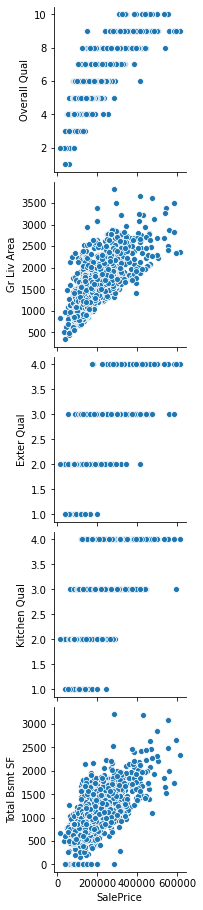

In [8]:
sns.pairplot(datatrain, y_vars =['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Kitchen Qual', 'Total Bsmt SF'], x_vars=['SalePrice'])

Comments: 
-  Ascertaining which features are the **most negative correlated** with Sale Price
- As expected, building age and remodelling age are one of the main factors which contribute to lower sale price

In [9]:
datatrain.corr()['SalePrice'].sort_values(ascending = True)

Building age           -0.565743
Remodel age            -0.542917
Mas Vnr Type_None      -0.405424
Garage Type_Detchd     -0.368135
Foundation_CBlock      -0.362839
MS Zoning_RM           -0.296629
Lot Shape              -0.286601
Roof Style_Gable       -0.257560
MS SubClass_30         -0.239278
Sale Type_WD           -0.222001
Garage Type_None       -0.221660
Neighborhood_OldTown   -0.214470
Neighborhood_NAmes     -0.195394
Exterior 1st_Wd Sdng   -0.193363
Neighborhood_Edwards   -0.183267
MS SubClass_50         -0.181193
Exterior 2nd_Wd Sdng   -0.172208
Fence                  -0.164708
Exterior 1st_MetalSd   -0.149694
Neighborhood_BrkSide   -0.139520
Neighborhood_Sawyer    -0.139003
Exterior 2nd_MetalSd   -0.138774
Neighborhood_IDOTRR    -0.137941
Alley_1                -0.133991
Enclosed Porch         -0.130165
Kitchen AbvGr          -0.122154
Exterior 1st_HdBoard   -0.121799
MS SubClass_160        -0.118819
Bldg Type_Twnhs        -0.117055
Neighborhood_MeadowV   -0.114730
Exterior 2

Comment - a visualisation of the 5 **most negative correlated** features with Sale Price

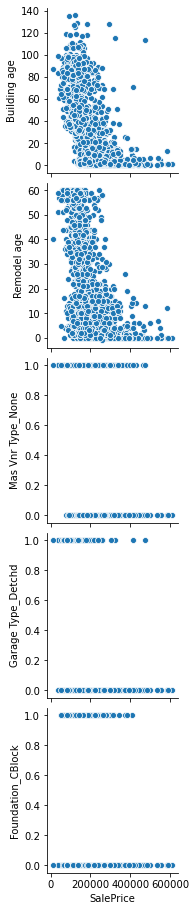

In [10]:
sns.pairplot(datatrain, y_vars =['Building age', 'Remodel age', 'Mas Vnr Type_None', 'Garage Type_Detchd', 'Foundation_CBlock'], x_vars=['SalePrice'])

**Distribution of data**

Comment - the Sale Price data is somewhat normally distributed. 

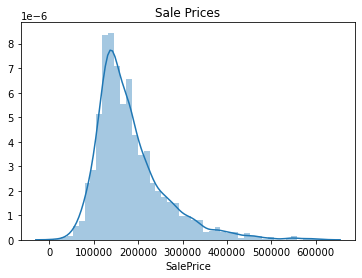

In [11]:
plt.title('Sale Prices')
sns.distplot(datatrain['SalePrice'], kde = True)

### Modelling

#### Model prep: Create features and target

In [12]:
features = [col for col in datatrain._get_numeric_data().columns if col != 'SalePrice']

X = datatrain[features]
y = datatrain['SalePrice']

#### Model prep: Train/test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [14]:
X_train.shape

(1508, 170)

In [15]:
X_test.shape

(503, 170)

#### Model prep: Scale data

In [16]:
ss = StandardScaler()

ss.fit(X_train) 

X_train = ss.transform(X_train)

X_test = ss.transform(X_test)

#### Actual Modelling

Instantiating Linear Regression, Lasso and Ridge

In [17]:
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [18]:
datatrain.head()

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,SalePrice,Building age,Remodel age,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Alley_1,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,69.0,13517,2,2,6,8,289.0,3,2,3,3,1,6,533.0,0.0,192.0,725.0,4,4,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,7,0,2,2.0,475.0,3,2,0,44,0,0,0,0,0,0,3,130500,34,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,43.0,11492,2,2,7,5,132.0,3,2,4,3,1,6,637.0,0.0,276.0,913.0,4,4,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,7,1,2,2.0,559.0,3,2,0,74,0,0,0,0,0,0,4,220000,13,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,68.0,7922,3,2,5,7,0.0,2,3,3,3,1,6,731.0,0.0,326.0,1057.0,2,4,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,7,0,1,1.0,246.0,3,2,0,52,0,0,0,0,0,0,1,109000,57,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,73.0,9802,3,2,5

#### Model Evaluation

**Linear Regression**

Comment on **Linear Regression** model below:
- Looking at the scores of the Linear Regression model, this Linear Regression won't make a good model to predict Sale Price
- One reason for the 'bad' scores can be attributed to the multicollinearity of the features, which means, high intercorrelation among 2 or more features. Multicollinearity can skew results if we are attempting to gauge relationship. 
- Examples of potential multicollinearity in this datatrain set: 
  1. Exterior 1 and Exterior 2 (likely a duplicate here. Exterior 1 alone should suffice)
  2. 3 season porch and screen porch
- Since Linear Regression is not a good fit, I shall evaluate other models


In [19]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
print('Linear Regression Train Score:', round(lr_scores.mean(),3))

Linear Regression Train Score: -5.305885426606361e+20


**Ridge Regression**

Comment on **Ridge Regression** model below:
- As Ridge Regression reduces complexity (by 'penalising' the size of parameter estimates) and addresses multicollinearity issues, the Ridge Regression model yields better score

In [20]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
print('Ridge Regression Train Score:', round(ridge_scores.mean(), 3))

Ridge Regression Train Score: 0.912


**Lasso Regression**

Comment on **Lasso Regression** model below:
- Similarly to Ridge Regression model, Lasso Regression also 'penalises' the parameters coefficient and addresses multicollinearity issues. 
- Under Lasso Regression model, some coefficients are zerorised
- As the score of the Lasso Regression model is the highest, **the Lasso model is chosen to predict Sale Price**

In [21]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
print('Linear Regression Lasso Train Score:', round(lasso_scores.mean(),3))

Linear Regression Lasso Train Score: 0.915


### Modelling - Lasso Regression

In [22]:
lasso.fit(X_train, y_train)

LassoCV(n_alphas=200)

Comment:

- Referring to the train and test scores below, this indicate that more than 90% of the variance in the Sale Price can be explained by the features
- As the train and test scores are close, I take comfort that the model is a good fit

In [23]:
print('Lasso train score', round(lasso.score(X_train, y_train),3))
print('Lasso test score', round(lasso.score(X_test, y_test),3))

Lasso train score 0.931
Lasso test score 0.901


In [24]:
pred = lasso.predict(X_test)

Comment:
- Looking at the scatter plot between Actual Sale Price and Predicted Sale Price below, which depicts a linear relationship, it seems like the Actual Sale Price are identical to the Predicted Sale Price


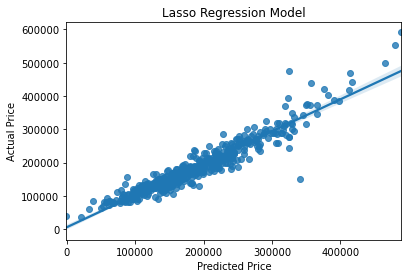

RMSE is: 
 24373.644121155787
R-squared is: 
 0.901


In [25]:
sns.regplot(x= pred, y = y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso Regression Model')

plt.show()

print ('RMSE is: \n', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print ('R-squared is: \n', round(r2_score(y_test, pred),3))


Comment - the residuals mostly centred at zero

In [26]:
residuals = y_test - pred

Text(0.5, 1.0, 'Residuals')

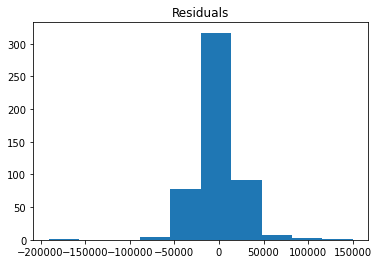

In [27]:
plt.hist(residuals)
plt.title('Residuals')

**Intercept**

Comment: 

- The intercept value is 181,663. 
- This indicates, if none of the features in the model are taken into consideration, Sale Price is approximately $181,663
- As we can observe in the following sections, some features can contribute positively or negatively to Sale Price


In [28]:
lasso.intercept_

181663.1452254642

**Coefficients**

Comment:
- Under Lasso Regression, 100 coefficients are zerorised
- Hence, user of this model may focus on the remaining 70 coefficients which contribute to changes in Sale Price

In [29]:
print('Total coefficient', np.shape(lasso.coef_))

positive_coef = lasso.coef_[lasso.coef_ > 0]

print('Total coefficient, excluding zero coefficient', np.shape(positive_coef))

Total coefficient (170,)
Total coefficient, excluding zero coefficient (70,)


In [30]:
print("Model coefficients:")

coef = pd.DataFrame(lasso.coef_, index = X.columns, columns = ['Coefficients']).sort_values(by = ['Coefficients'], ascending = False)

coef

Model coefficients:


,Coefficients
Gr Liv Area,26645.740994
Overall Qual,12013.833702
BsmtFin SF 1,9686.420937
Total Bsmt SF,7163.438230
Neighborhood_NridgHt,6295.017648
Mas Vnr Area,6094.486544
Exter Qual,5809.459162
Neighborhood_StoneBr,5745.186321
Overall Cond,5146.202552
Sale Type_New,4616.011961


Comment:

- The chart below shows the top 10 real estate features which contribute positively to Sale Price. 
- The highest coefficient is depicted by the ground living area measured in square feet (Gr Liv Area). With a coefficient of 26,646 and assuming the rest of the features remain constant, this indicates, for every 1 square feet in ground living area, sale price may increase by approximately $26,646.  
- Two neighborhoods made it to the top 10, namely Northridge Heights and StoneBrooks. Apparently, Northrigde Heights is located at the school district and Stonebrooks is located near Iowa State University. These could be the reasons why these neighborhoods are in demand.  
- Overall, it seems like size and quality do matter, as depicted by the features.

Text(0.5, 0, 'Strength of Predictor')

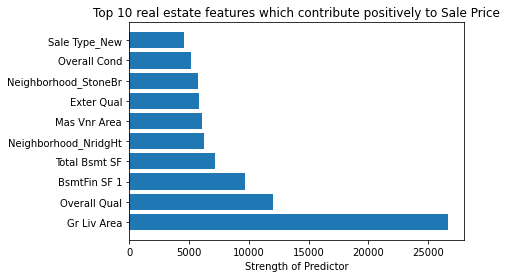

In [31]:
plt.barh(y=coef.index[:10], width=coef['Coefficients'][0:10]);
plt.title('Top 10 real estate features which contribute positively to Sale Price')
plt.xlabel('Strength of Predictor')

Comment:

- The chart below shows the top 10 real estate features which contribute negatively to Sale Price. 
- The highest negative coefficient is depicted by the building age, measured in years. With a coefficient of -8,496 and assuming the rest of the features remain constant, this indicates, each year the building ages, sale price may decrease by approximately $8,496.   


Text(0.5, 0, 'Strength of Predictor')

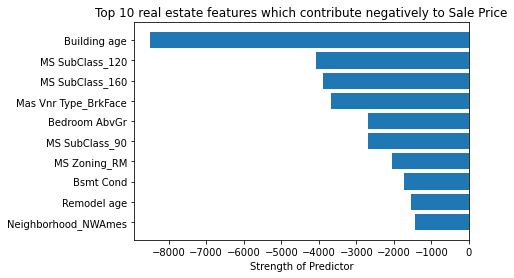

In [32]:
plt.barh(y=coef.index[-10:], width=coef['Coefficients'][-10:]);
plt.title('Top 10 real estate features which contribute negatively to Sale Price')
plt.xlabel('Strength of Predictor')

### Conclusion

#### Model choice

- The Lasso Regression model is the model with the best score among Linear Regression and Ridge Regression


#### Important features from final Lasso Regression model 

We can conclude that size and quality of the real estate contribute positively to Sale Price while age of the building is the main negative feature that contribute negatively to Sale Price.

|Top 5 Positive Feature       | Coefficient  | 
|---------------|--------------|
| Gr Liv Area |  26645.740994  | 
| Overall Qual |  12013.833702    | 
| BsmtFin SF 1 | 9686.420937    | 
| Total Bsmt SF | 7163.438230| 
| Neighborhood_NridgHt | 6295.01764   | 


| Top 5 Negative Feature       | Coefficient  | 
|---------------|--------------|
| Building age |  -8496.417470  | 
| MS SubClass_120 |  -4064.612134    | 
| MS SubClass_160 | -3894.699231    | 
| Mas Vnr Type_BrkFace | -3685.764617| 
| Bedroom AbvGr | -2689.418166  | 	

### Recommendation

- The Client (i.e. the real estate agency) may adopt the Lasso Regression Model
- Users of the model (i.e. the real estate agents) may use the model to gauge Sale Price. Once Sale Price is established, the user may use this benchmark price as base price for negotiation or look out for a good deal in the market.
- Real Estate Agents may use this model to advise homeowners on how to improve selling prices of the house by referring to the coefficients. For eg, remodel the house to improve overall quality or extend the size of living area or basement to boost selling price.

**Limitations**
- This model assumes transactions take place in an orderly manner between willing buyer and willing seller.
- Hence, this model may not be suitable during forced sale or auction sale.
- Users of this model should exercise some judgement and not rely on the model in its entirety. For eg. this model is not trained with data collected during the Covid-19 pandemic. Selling a house during the Covid-19 pandemic may require additional discount applied to the Sale Price to entice buyers to a speedy sale. 
- This model may not be suitable for predicting sale prices of real estate outside Ames, Iowa as the model is only trained with datasets in Ames, Iowa. 

**Next steps**
- It is a good practice for the firm to maintain such records and the firm should continue this practice of record keeping so that such data can be utilised when the model is revisited in the future
- I would recommend the compilation of additional data to make it more robust: for eg. purpose of the purchase, i.e. whether for investment or for own occupation. Buyers who purchase for investment vs own stay may have different motivation.  